In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from typing import Dict
import pickle


def set_default_plot_style():
    plt.style.use("default")  # start clean

    plt.rcParams["axes.grid"] = True
    plt.rcParams["grid.alpha"] = 0.3
    plt.rcParams["grid.linestyle"] = "--"
    plt.rcParams["grid.color"] = "gray"

    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False

    plt.rcParams["axes.linewidth"] = 1.2

    plt.rcParams["legend.frameon"] = False

    plt.rcParams["font.size"] = 15
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["legend.fontsize"] = 15

# Call once at the top of your script
set_default_plot_style()

In [31]:
L_vals = [6000, 8000, 10_000, 12_000]
epsilon_prime_vals = [0.28775791]

time_prefact = 500

num_initial_conds = 500
initial_state_prob = 0.5

delta_vals = [0.1]

time_step = 10


cmap = plt.colormaps.get_cmap("Oranges").resampled(len(L_vals) + 5)


In [32]:
# If first time

collected_rhos = {}
collected_rho_stds = {}

for L_val in L_vals:
    print(f"L_val: {L_val}")

    T_f = L_val*time_prefact
    collected_rhos[L_val] = {}
    collected_rho_stds[L_val] = {}

    for delta_val in delta_vals:
        print(f"L_val: {L_val} | delta: {delta_val}")
        delta_val_name = f"{delta_val}".replace(".", "p")

        collected_rhos[L_val][delta_val] = {}
        collected_rho_stds[L_val][delta_val] = {}

        for epsilon_prime in epsilon_prime_vals:
            epsilon_val_name = f"{epsilon_prime}".replace(".", "p")

            current_rhos = np.array([[0.0 for _ in range(L_val * time_prefact // time_step)] for _ in range(num_initial_conds)])
            for init_cond in range(1, num_initial_conds+1):
                sample_filepath_name = f"data/time_rand_delta/rho_per_time/IC1/L{L_val}/delta{delta_val_name}/IC1_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}_sample{init_cond}.csv"
                df = pd.read_csv(sample_filepath_name)

                current_rhos[init_cond-1] = df.rho
            
            collected_rhos[L_val][delta_val][epsilon_prime] = np.mean(current_rhos.T, axis=1)
            collected_rho_stds[L_val][delta_val][epsilon_prime] = np.std(current_rhos.T, axis=1)

        pickle_path = f"data/time_rand_delta/rho_per_time/IC{num_initial_conds}/L{L_val}/delta{delta_val_name}/IC{num_initial_conds}_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}"
        dir_path = os.path.dirname(pickle_path)
        os.makedirs(dir_path, exist_ok=True)
        
        with open(pickle_path + "mean.pickle", "wb") as f:
            pickle.dump(collected_rhos[L_val][delta_val], f)
        with open(pickle_path + "stds.pickle", "wb") as f:
            pickle.dump(collected_rho_stds[L_val][delta_val], f)

L_val: 6000
L_val: 6000 | delta: 0.1
L_val: 8000
L_val: 8000 | delta: 0.1


KeyboardInterrupt: 

In [33]:
# If you have already processed and saved the data as pickled
collected_rhos = {}
collected_rho_stds = {}

for L_val in L_vals:
    print(f"L_val: {L_val}")

    T_f = L_val*time_prefact
    collected_rhos[L_val] = {}
    collected_rho_stds[L_val] = {}

    for delta_val in delta_vals:
        print(f"L_val: {L_val} | delta: {delta_val}")
        delta_val_name = f"{delta_val}".replace(".", "p")

        collected_rhos[L_val][delta_val] = {}
        collected_rho_stds[L_val][delta_val] = {}

        pickle_path = f"data/time_rand_delta/rho_per_time/IC{num_initial_conds}/L{L_val}/delta{delta_val_name}/IC{num_initial_conds}_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}"
        
        with open(pickle_path + "mean.pickle", "rb") as f:
            collected_rhos[L_val][delta_val] = pickle.load(f)
        with open(pickle_path + "stds.pickle", "rb") as f:
            collected_rho_stds[L_val][delta_val] = pickle.load(f)

L_val: 6000
L_val: 6000 | delta: 0.1
L_val: 8000
L_val: 8000 | delta: 0.1
L_val: 10000
L_val: 10000 | delta: 0.1
L_val: 12000
L_val: 12000 | delta: 0.1


In [ ]:
collected_rhos[L_vals[0]][delta_vals[0]][epsilon_prime_vals[0]]

array([0.50643833, 0.54720433, 0.56502867, ..., 0.95238967, 0.95189333,
       0.95249233], shape=(300000,))

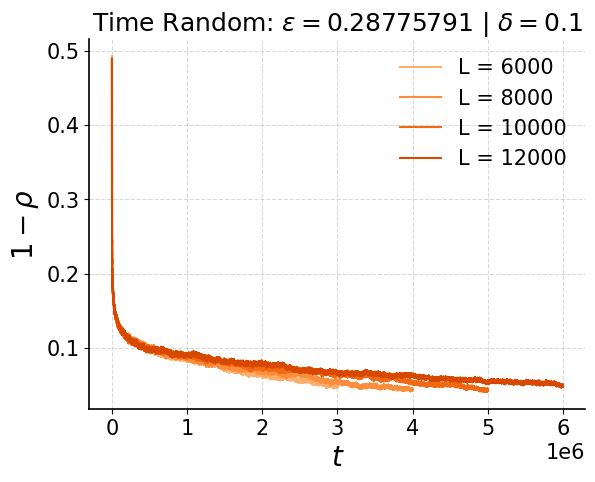

In [ ]:
for delta_val in delta_vals:
    delta_val_name = f"{delta_val}".replace(".", "p")
    for epsilon_val in epsilon_prime_vals:
        for i, L in enumerate(L_vals):
            c = cmap(i+3)
            time_vals = [i * time_step for i in range(0, L*time_prefact // time_step)]
            plt.plot(
                time_vals, 
                1-collected_rhos[L][delta_val][epsilon_val], 
                label = f"L = {L}",
                # fmt='--',  
                # markersize=3,
                # capsize=3,
                c=c
                )
            
        # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
        plt.title(fr"Time Random: $\epsilon = {epsilon_val}$ | $\delta = {delta_val}$")
        plt.xlabel(r"$t$")
        plt.ylabel(r"$1 - \rho$")
        plt.legend()

    plt.show()


/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_14153/1946035925.py:8: RuntimeWarning: divide by zero encountered in log
  np.log(np.array(time_vals)),


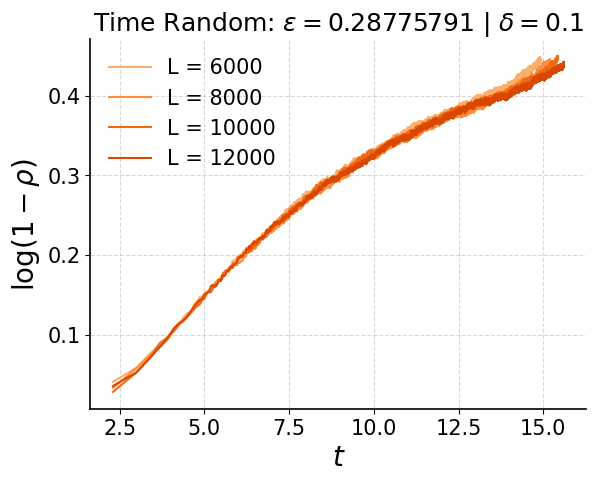

In [38]:
for delta_val in delta_vals:
    delta_val_name = f"{delta_val}".replace(".", "p")
    for epsilon_val in epsilon_prime_vals:
        for i, L in enumerate(L_vals):
            c = cmap(i+3)
            time_vals = [i * time_step for i in range(0, L*time_prefact // time_step)]
            plt.plot(
                np.log(np.array(time_vals)), 
                np.abs(np.array(1-collected_rhos[L][delta_val][epsilon_val]) - np.array(1-collected_rhos[L][delta_val][epsilon_val][0]) + 0.0000001), 
                label = f"L = {L}",
                # fmt='--',  
                # markersize=3,
                # capsize=3,
                c=c
                )
            
        # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
        plt.title(fr"Time Random: $\epsilon = {epsilon_val}$ | $\delta = {delta_val}$")
        plt.xlabel(r"$t$")
        plt.ylabel(r"$\log(1 - \rho)$")
        plt.legend()

    plt.show()

In [ ]:
for delta_val in delta_vals:
    delta_val_name = f"{delta_val}".replace(".", "p")
    for epsilon_val in epsilon_prime_vals:
        for i, L in enumerate(L_vals):
            c = cmap(i+3)
            time_vals = [i * time_step for i in range(0, L*time_prefact // time_step)]
            plt.plot(
                time_vals, 
                1-collected_rhos[L][delta_val][epsilon_val], 
                label = f"L = {L}",
                # fmt='--',  
                # markersize=3,
                # capsize=3,
                c=c
                )
            
        # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
        plt.title(fr"Time Random: $\epsilon = {epsilon_val}$ | $\delta = {delta_val}$")
        plt.xlabel(r"$t$")
        plt.ylabel(r"$1 - \rho$")
        plt.legend()

    plt.show()


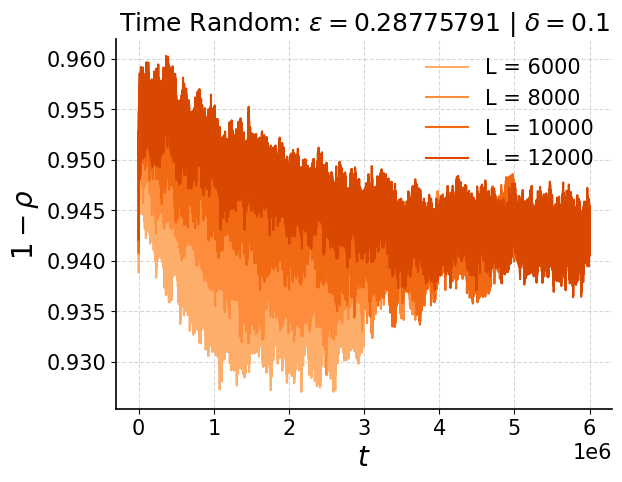

In [29]:
for delta_val in delta_vals:
    delta_val_name = f"{delta_val}".replace(".", "p")
    for epsilon_val in epsilon_prime_vals:
        for i, L in enumerate(L_vals):
            c = cmap(i+3)
            time_vals = [i * time_step for i in range(0, L*time_prefact // time_step)]
            plt.plot(
                time_vals, 
                1-collected_rho_stds[L][delta_val][epsilon_val], 
                label = f"L = {L}",
                # fmt='--',  
                # markersize=3,
                # capsize=3,
                c=c
                )
            
        # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
        plt.title(fr"Time Random: $\epsilon = {epsilon_val}$ | $\delta = {delta_val}$")
        plt.xlabel(r"$t$")
        plt.ylabel(r"$1 - \rho$")
        plt.legend()

    plt.show()